In [63]:
import torch
from numpy import asarray,stack,concatenate,convolve,ones,arange,stack,log,sqrt
from glob import glob

from matplotlib.pyplot import plot,semilogx,semilogy,subplots,legend,fill_between,xlim,ylim

import re

In [64]:
def read_loss(path):
    checkpoints = sorted(glob(path + '/*.pth'))
    
    loss = []
    test_loss = []
    

    for checkpoint in checkpoints:

        loss += [torch.load(checkpoint,map_location=torch.device('cpu'))['loss']]
        test_loss += [torch.load(checkpoint,map_location=torch.device('cpu'))['test_loss']]
    return asarray(loss),asarray(test_loss)

def loss_curves(path):

    folders = glob(path + '*')
    folders = sorted(folders,key = lambda x: int(re.findall(r'\d+',x)[-1]))

    loss = []
    test_loss = []
    
    for folder in folders[:]:
        print(folder)
        
        l,v = read_loss(folder)

        loss += [l.reshape(-1,5)]
        test_loss += [v.mean(1)]
        
    return loss,test_loss

In [65]:
loss,test_loss = loss_curves('run/AdamMomentum/MSE_ResNet1')

run/AdamMomentum/MSE_ResNet1
run/AdamMomentum/MSE_ResNet1_16
run/AdamMomentum/MSE_ResNet1_24


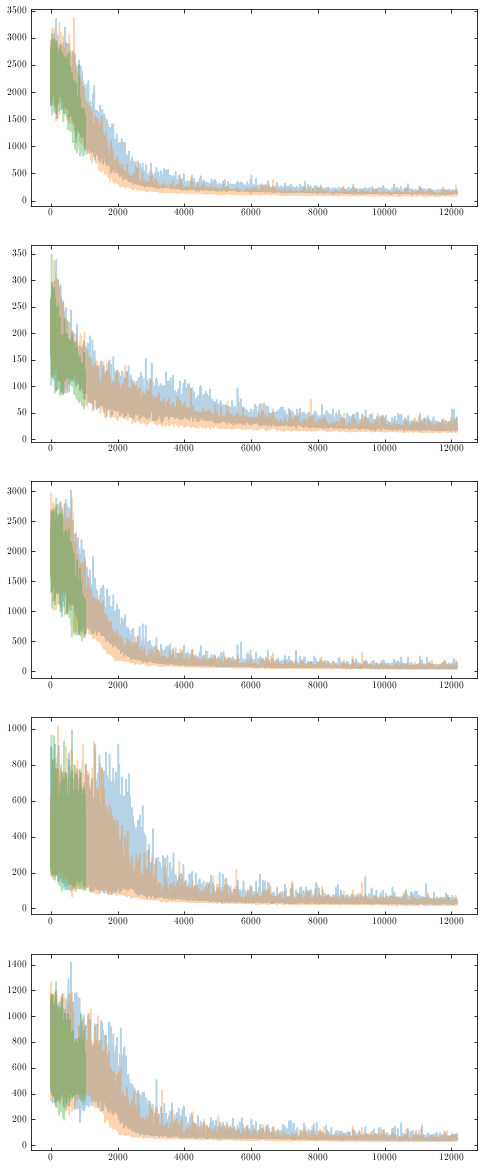

In [66]:
fig,ax = subplots(5,1,figsize=(8,21))

for i,training in enumerate(loss):
    for j,element in enumerate(training.T):
        ax[j].plot(sqrt(element),alpha=0.33)
        

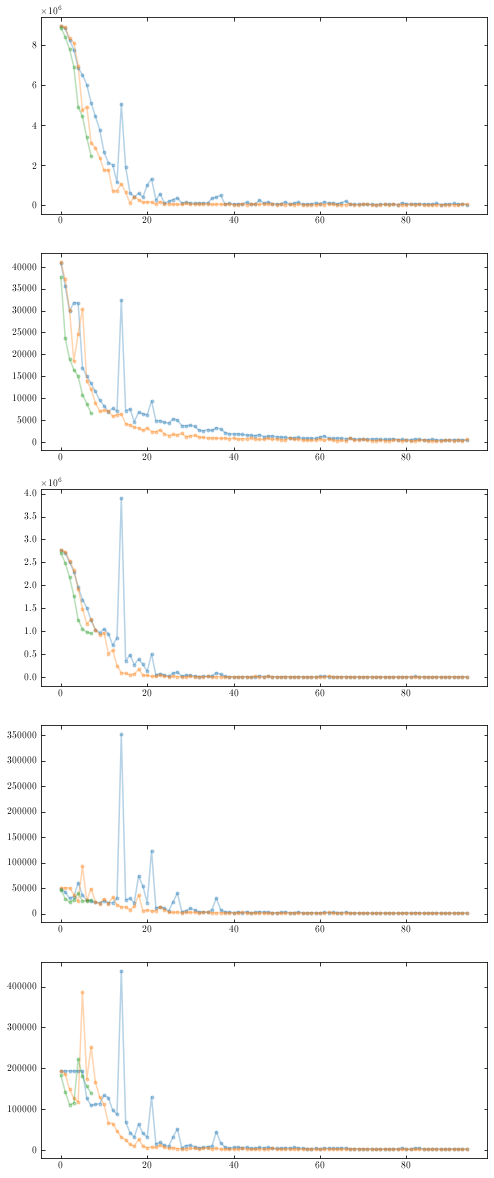

In [67]:
fig,ax = subplots(5,1,figsize=(8,21))

for i,training in enumerate(test_loss):
    for j,element in enumerate(training.T):
        ax[j].plot(element,'.-',alpha=0.33)